In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv(r"C:\Users\Nikita\Downloads\banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [18]:
df.duplicated().sum()

0

Good    4006
Bad     3994
Name: Quality, dtype: int64


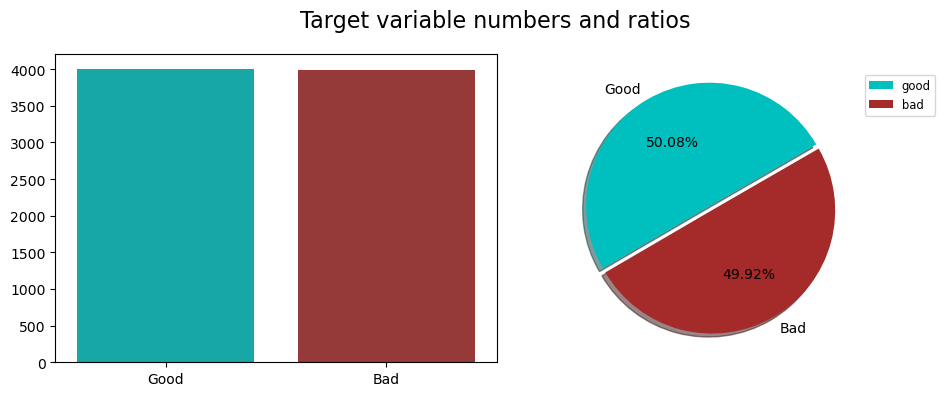

In [20]:
plt.figure(figsize=(10,4))
cols = ["c", "brown"]
plt.subplot(1,2,1)
sns.barplot(x=df["Quality"].value_counts().index, y=df["Quality"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["Quality"].value_counts(), labels=df["Quality"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["good", "bad"], loc=(1,0.8), fontsize="small")
plt.suptitle("Target variable numbers and ratios", fontsize=16)
plt.tight_layout()
print(df.Quality.value_counts())
plt.show()

In [24]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [22]:
num_cols = df.select_dtypes(include=["float64"]).columns

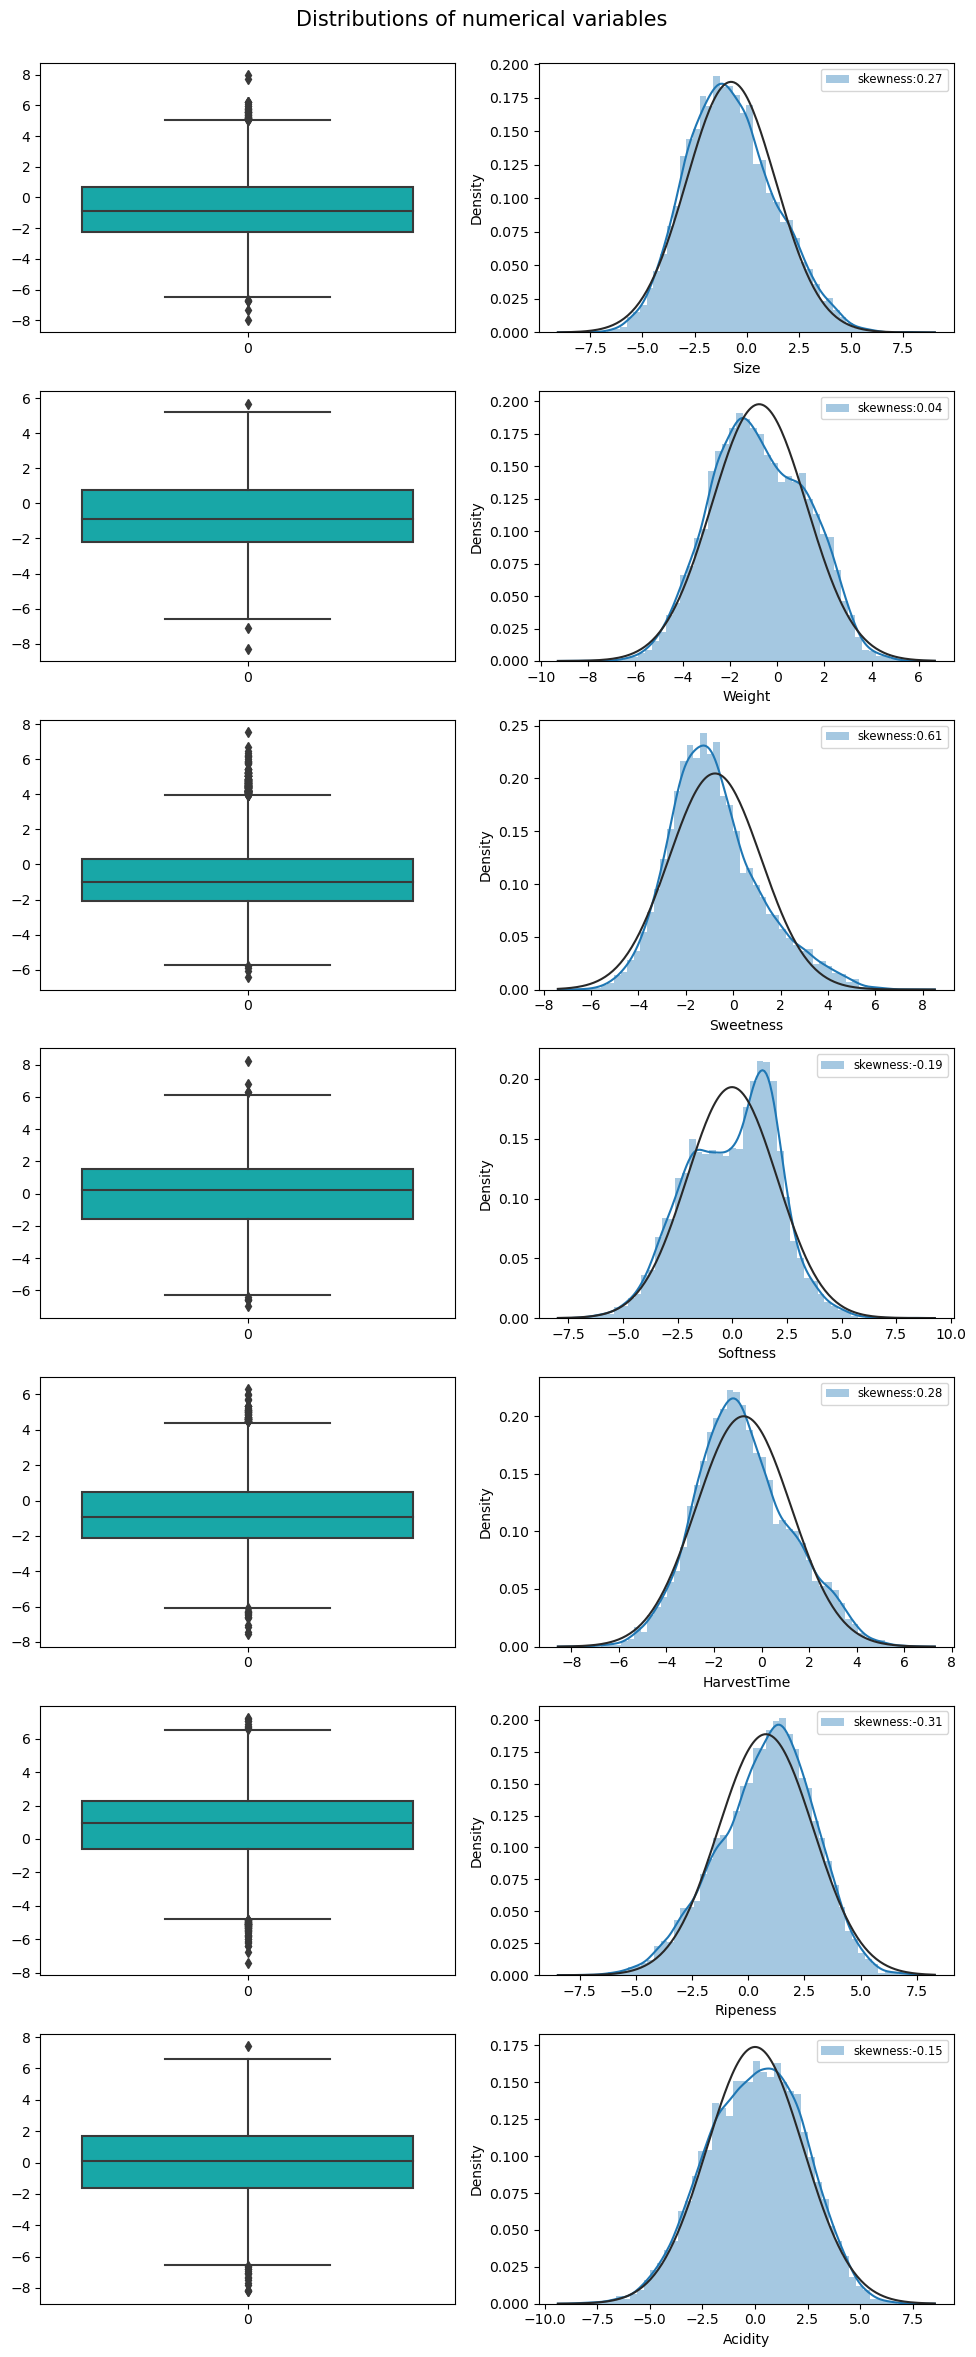

In [23]:
plt.figure(figsize=(10,24))
j = 1
for i in num_cols:
    plt.subplot(7,2, j)
    sns.boxplot(df[i], color="c")
    plt.subplot(7,2, j+1)
    sns.distplot(df[i], label=f"skewness:{df[i].skew():.2f}", fit=norm)
    j = j +2
    plt.legend(fontsize="small")
    plt.suptitle("Distributions of numerical variables\n\n", fontsize=15)
plt.tight_layout()
plt.show()

In [26]:
def clean_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    data = data[~((data[column] > upper_limit) | (data[column] < lower_limit))]
    return data

for i in num_cols:
    df = clean_outliers(df, i)

In [27]:
df["Quality"] = df["Quality"].map({"Good":1, "Bad":0})

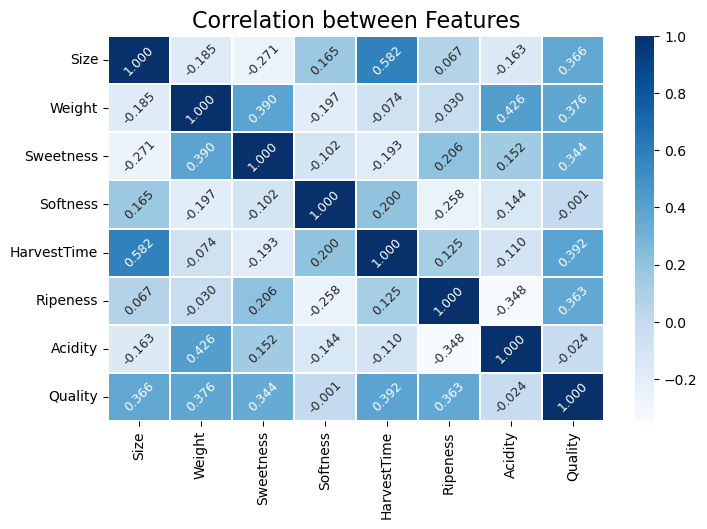

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), linewidths=0.05, annot=True,
            annot_kws={'size': 9, 'rotation': 45}, fmt='.3f', cmap="Blues")
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16)
plt.show()

In [ ]:
#Standardization

In [37]:
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])

In [40]:
print(df.describe())

              Size       Weight     Sweetness     Softness  HarvestTime  \
count  7580.000000  7580.000000  7.580000e+03  7580.000000  7580.000000   
mean      0.000000     0.000000 -2.999653e-17     0.000000     0.000000   
std       1.000066     1.000066  1.000066e+00     1.000066     1.000066   
min      -2.728345    -2.924735 -2.682278e+00    -3.059827    -2.703886   
25%      -0.724770    -0.729051 -6.973139e-01    -0.779911    -0.697276   
50%      -0.064572    -0.060589 -9.046186e-02     0.108862    -0.083953   
75%       0.670903     0.753746  6.101736e-01     0.766188     0.652217   
max       2.752471     2.904606  2.618095e+00     3.050642     2.676161   

           Ripeness      Acidity      Quality  
count  7.580000e+03  7580.000000  7580.000000  
mean  -2.999653e-17     0.000000     0.484301  
std    1.000066e+00     1.000066     0.499786  
min   -2.713371e+00    -2.914739     0.000000  
25%   -6.586645e-01    -0.727124     0.000000  
50%    8.887932e-02     0.032886    

In [ ]:
#train/test split

In [41]:
y = df["Quality"]
X = df.drop(["Quality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_test

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
865,0.888611,1.315498,2.323763,-0.073568,-0.103126,0.646270,1.648209
723,-0.544362,1.662245,1.603553,-0.376382,0.306437,0.665035,1.057042
985,-0.795965,1.391108,1.594191,-1.702145,-0.651384,0.217106,-1.195671
4636,0.748184,0.180324,-1.432099,-1.118210,1.234522,-0.927853,0.453056
7450,0.318824,0.457024,-0.972467,1.089821,0.574380,-1.813848,0.549980
...,...,...,...,...,...,...,...
5978,1.259276,-0.083912,-0.295936,1.211787,1.110543,0.442075,-0.769224
1943,-1.741984,1.153729,0.644617,-1.477282,-0.565929,0.723549,0.287739
3739,-0.352549,-0.722560,-0.158788,-0.303893,-0.071416,0.841019,-1.024089
4735,0.643171,0.219950,-0.920675,0.366458,1.381396,0.316363,-0.277177


In [ ]:
#Comparison of Models

In [31]:
model_list = [RandomForestClassifier(), LogisticRegression(), SVC(), MLPClassifier(), CatBoostClassifier(verbose=False),
             AdaBoostClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(),
             XGBClassifier(), XGBRFClassifier()]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")

RandomForestClassifier accuracy: 0.974

LogisticRegression accuracy: 0.884

SVC accuracy: 0.984

MLPClassifier accuracy: 0.986

CatBoostClassifier accuracy: 0.980

AdaBoostClassifier accuracy: 0.894

ExtraTreesClassifier accuracy: 0.980

GradientBoostingClassifier accuracy: 0.964

HistGradientBoostingClassifier accuracy: 0.977

XGBClassifier accuracy: 0.981

XGBRFClassifier accuracy: 0.954



In [ ]:
#Tuned Model (MLPClassifier)

In [ ]:
#mlpc = MLPClassifier(max_iter=100,random_state=6)
#param_list = {"hidden_layer_sizes": [(100,), (100, 100,)],
#             "alpha": [0.00505, 0.0001, 0.001, 0.05, 0.04, 0.02, 0.01, 0.1]}
#mlpc_cv = GridSearchCV(estimator=mlpc, param_grid=param_list, cv=5, n_jobs=-1).fit(X_train, y_train)

In [ ]:
#model assessment

In [45]:
mlpc = MLPClassifier(max_iter=100, hidden_layer_sizes=(100,100), alpha=0.00505, random_state=6).fit(X_train, y_train)
y_pred_final = mlpc.predict(X_test)
accuracy_mlpc = accuracy_score(y_test, y_pred_final)
print(f"accuracy: {accuracy_mlpc:.2f}")

accuracy: 0.99


In [33]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1127
           1       0.99      0.99      0.99      1147

    accuracy                           0.99      2274
   macro avg       0.99      0.99      0.99      2274
weighted avg       0.99      0.99      0.99      2274



In [ ]:
#confusion matrix

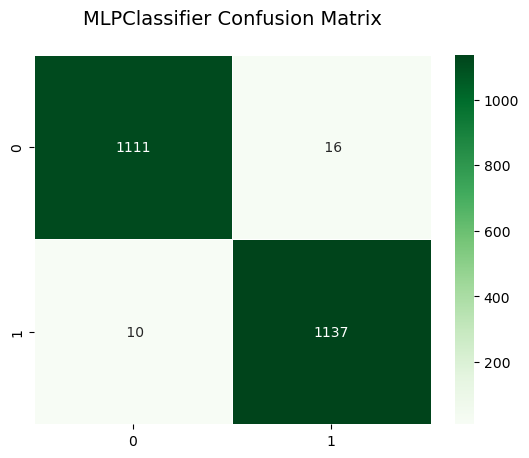

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='3g', linewidths=0.6, cmap="Greens",)
plt.title("MLPClassifier Confusion Matrix\n", fontsize=14)
plt.show()

In [47]:
y_prob = mlpc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

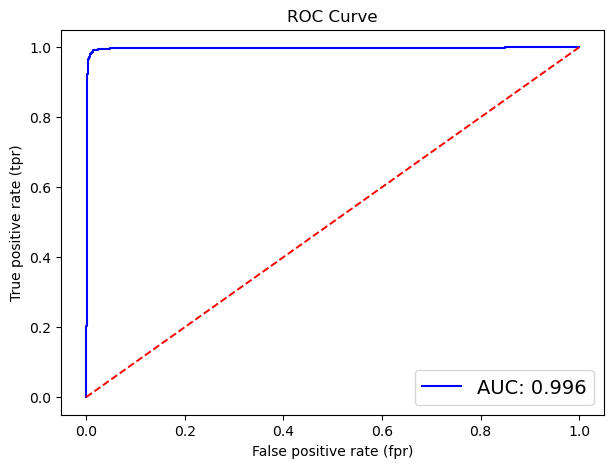

In [36]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", label= f"AUC: {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve")
plt.show()

In [55]:
import pandas as pd
dfnew = pd.read_csv(r"C:\Users\Nikita\Downloads\banana_quality.csv")
actual_quality = dfnew["Quality"]
X = dfnew.drop("Quality", axis=1)
predictions = model.predict(X)
dfnew["Predicted_Quality"] = predictions
print(dfnew)

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  Predicted_Quality  
0     0.271290    Good                  1  
1     0.307325    Good                  0  
2  

In [56]:
excel_file_path = r"C:\Users\Nikita\Downloads\output.xlsx"
# Сохраните датафрейм в файл Excel
dfnew.to_excel(excel_file_path, index=False)  # Установите index=False, если не хотите сохранять индексы строк